In [38]:
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

fname = '../data/theses_dump_21-03-2017.json'

def jl_to_df(fname):
    with open(fname) as f:
        return pd.DataFrame([json.loads(line) for line in f])

In [39]:
df = jl_to_df(fname)

In [40]:
df

,_id,abstract_en,abstract_fi,abstract_sv,authors,collections,date,degrees,documents_url,keywords,language,organization,orientation,programme,subjects,titles,topics,universities,url,year
0,oai:www.theseus.fi:10024/474,[The aim of this thesis is to chart the intern...,[Opinnäytetyössä kartoitettiin verkkovideoiden...,[],"[Hakala, Lilli]","[com_10024_14, col_10024_174]",[2013-08-19T10:18:05Z],[Viestintä],[http://www.theseus.fi/bitstream/10024/474/1/H...,[],[fi],[Satakunnan ammattikorkeakoulu],[],[Viestinnän koulutusohjelma],"[verkkojulkaiseminen, verkkoviestintä, verkkoj...",[Hyvä ja toimiva video sanomalehden verkkopalv...,"[verkkojulkaiseminen, verkkolehdet, verkkovies...",[Satakunnan ammattikorkeakoulu],[http://www.theseus.fi/handle/10024/474],[2008]
1,oai:www.theseus.fi:10024/592,[Video surveillance is evolving from analog sy...,[Kameravalvontatekniikka on muutoksessa: analo...,[],"[Halkosaari, Antti]","[com_10024_12, col_10024_270]",[2013-05-06T15:30:26Z],[Turvallisuusalan koulutusohjelma],[http://www.theseus.fi/bitstream/10024/592/1/O...,[],[fi],[Laurea ammattikorkeakoulu],[],[Turvallisuusalan koulutusohjelma],"[valvonta, yritykset, turvallisuus, toimitilat...",[Kameravalvonta muutoksessa],"[turva-ala, kamerat, tietoverkot, turvallisuus...",[Laurea-ammattikorkeakoulu],[http://www.theseus.fi/handle/10024/592],[2007]
2,oai:www.theseus.fi:10024/492,[The aim of the master´s thesis was to study i...,[Opinnäytetyön tarkoituksena oli selvittää tie...,[],"[Aaltonen, Päivi, Katajisto, Helena]","[com_10024_14, col_10024_153]",[2013-08-19T09:20:19Z],[Hoitotyö],[http://www.theseus.fi/bitstream/10024/492/1/2...,[],[fi],[Satakunnan ammattikorkeakoulu],[Hoitotyön suuntautumisvaihtoehto],[Hoitotyön koulutusohjelma],"[hoitotyö, kirjaaminen, jatkuvuus, raportointi]",[Hoitotyöntekijöiden kokemuksia raportointikäy...,"[hoitotyö, kirjaaminen, raportointi, jatkuvuus]",[Satakunnan ammattikorkeakoulu],[http://www.theseus.fi/handle/10024/492],[2008]
3,oai:www.theseus.fi:10024/491,[The aim of this study was to find out what ki...,[Opinnäytetyön tavoitteena oli saada tietoa ty...,[],"[Silander, Merja]","[com_10024_14, col_10024_159]",[2013-08-19T09:37:29Z],[Kuntoutusohjaus ja -suunnittelu],[http://www.theseus.fi/bitstream/10024/491/1/2...,[],[fi],[Satakunnan ammattikorkeakoulu],[],[Kuntoutusohjauksen ja suunnittelun koulutusoh...,"[MS-tauti, työterveyshuolto, työkyky]",[MS-tautia sairastavien kokemuksia työterveysh...,"[ms-tauti, työterveyshuolto, työkyky]",[Satakunnan ammattikorkeakoulu],[http://www.theseus.fi/handle/10024/491],[2008]
4,oai:www.theseus.fi:10024/493,[The aim of the present bachelor´s thesis was ...,[Tämän opinnäytetyön aiheena oli kehittää aute...,[],"[Levola, Johanna]","[com_10024_14, col_10024_169]",[2013-08-19T10:03:28Z],[Sosiaaliala],[http://www.theseus.fi/bitstream/10024/493/1/2...,[],[fi],[Satakunnan ammattikorkeakoulu],[Erityisryhmien sosiaalipalvelujen suuntautumi...,[Sosiaalialan koulutusohjelma],"[kehitysvammaiset, asuminen, asumispalvelut, p...",[Tilapäisasumisen kehittäminen asuntola Apollo...,"[kehitysvammaiset, asuminen, perehdytys, asumi...",[Satakunnan ammattikorkeakoulu],[http://www.theseus.fi/handle/10024/493],[2008]
5,oai:www.theseus.fi:10024/494,[Intention of this thesis work was to create a...,[Tämän opinnäytetyön tarkoituksena oli tuottaa...,[],"[Korpela, Kati]","[com_10024_14, col_10024_153]",[2013-08-19T09:20:21Z],[Hoitotyö],[http://www.theseus.fi/bitstream/10024/494/1/2...,[],[fi],[Satakunnan ammattikorkeakoulu],[Hoitotyön suuntautumisvaihtoehto],[Hoitotyön koulutusohjelma],"[nielemishäiriöt, nieleminen, ikääntyminen, au...",[Opas hoitajille nielemisvaikeuksien tunnistam...,"[nieleminen, ohjeet, auttaminen, ravitsemus, i...",[Satakunnan ammattikorkeakoulu],[http://www.theseus.fi/handle/10024/494],[2008]
6,oai:www.theseus.fi:10024/495,[The purpose of this study was to survey fathe...,[Tämän opinnäytetyön aiheena oli tarkastella e...,[],"[Rantala, Terhi]","[com_10024_14, col_10024_169]",[2013-08-19T10:03:30Z],[

In [9]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

n_samples = 100000
n_features = 1000
n_topics = 50
n_top_words = 10

# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

t0 = time()
print("Loading dataset and extracting TF-IDF features...")
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                             stop_words='english')
tfidf = vectorizer.fit_transform(df["abstract_fi"].apply(lambda x: x[0] if len(x) > 0 else '')[:n_samples])
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Loading dataset and extracting TF-IDF features...
done in 27.620s.
Fitting the NMF model with n_samples=100000 and n_features=1000...
done in 238.417s.
Topic #0:
ja niiden tavoitteena kautta kuten suunnittelu siihen uusia niihin erityisesti

Topic #1:
olivat aineisto koettiin kokemuksia kerättiin tietoa kokivat analysoitiin tulosten osa

Topic #2:
oli tavoitteena tarkoituksena olivat selvittää saada tutkia kaksi suunnitella joka

Topic #3:
opinnäytetyön tämän tarkoituksena tavoitteena aiheena lisäksi teoriaosuudessa toimeksiantajan toiminnallisen tuloksena

Topic #4:
yrityksen yritys yritykselle case yrityksessä liiketoiminnan henkilöstön luoda tuotteiden pohjalta

Topic #5:
kanssa yhteistyössä yhdessä yhteistyötä yhteistyön yhteistyö toteutettiin asiakkaan henkilökunnan työntekijöiden

Topic #6:
sekä lisäksi muun muassa niiden liittyviä tavoitteena koostuu osalta alan

Topic #7:
nuorten nuoret nuoren nuorille ja koulun heidän terveyden tietoa tukea

Topic #8:
tulee tulisi jotta olla h

(array([ 266.,  186.,  103.,   88.,   60.,   49.,   29.,   39.,   35.,
          24.,   17.,   20.,   22.,   14.,    7.,   12.,   11.,    6.,
          10.,    5.,    8.,    7.,    8.,    5.,    5.,    3.,    5.,
           2.,    3.,    3.]),
 array([ 0.1 ,  0.13,  0.16,  0.19,  0.22,  0.25,  0.28,  0.31,  0.34,
         0.37,  0.4 ,  0.43,  0.46,  0.49,  0.52,  0.55,  0.58,  0.61,
         0.64,  0.67,  0.7 ,  0.73,  0.76,  0.79,  0.82,  0.85,  0.88,
         0.91,  0.94,  0.97,  1.  ]),
 <a list of 30 Patch objects>)

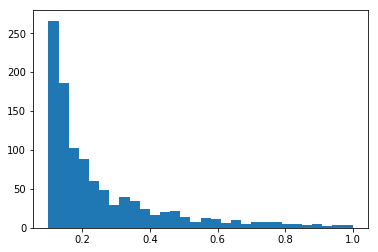

In [28]:
plt.hist(nmf.components_.max(axis=0), bins=30, range=(0.1, 1))

In [37]:
c = df["degrees"].apply(lambda x: x[0] if len(x)>0 else '').value_counts()
c

Liiketalouden koulutusohjelma                                                      8895
Hoitotyön koulutusohjelma                                                          7391
Sosiaalialan koulutusohjelma                                                       4897
Liiketalous                                                                        3224
Hoitotyö                                                                           2700
Tietojenkäsittelyn koulutusohjelma                                                 2230
Liiketalouden tutkinto-ohjelma                                                     2054
Tietotekniikan koulutusohjelma                                                     2039
Rakennustekniikan koulutusohjelma                                                  1962
Kone- ja tuotantotekniikan koulutusohjelma                                         1903
Degree Programme in International Business                                         1838
Matkailun koulutusohjelma       

In [40]:
c[c > 100].shape

(216,)

## Hierarchical clustering

In [41]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import pairwise_distances
import numpy as np

In [42]:
df["degree"] = df["degrees"].apply(lambda x: x[0] if len(x)>0 else "")
df["university"] = df["universities"].apply(lambda x: x[0] if len(x)>0 else "")
#df["collection"] = df["collections"].apply(lambda x: filter(lambda x: "col" in x, x)).apply(lambda x: x[0] if len(x)>0 else "")
#df["community"] = df["collections"].apply(lambda x: filter(lambda x: "com" in x, x)).apply(lambda x: x[0] if len(x)>0 else "")

In [123]:
temp = df.groupby(["degree"])["topics"].sum()
topics = temp.apply(lambda topics: " ".join(topics))
# TODO: use custom vocabulary not to split multi word topics
# Could also use DictVectorizer to dictionary with counts

In [44]:
top = topics[topics.apply(lambda x: len(x) > 1000).values]

In [45]:
top

degree
                                                                                                                           kilpailukyky benchmarking matkailu yritykset t...
 Bioanalytik                                                                                                               sedimentundersökning av urin src partiklar i u...
 Elektroteknik                                                                                                             alarm mikrokretsar mikropiirit gsm-modem gsm h...
 Lantmäteriteknik                                                                                                          småhusområden korsholm mustasaari visualiserin...
 Sähkötekniikka                                                                                                            generaattorit automaatioasennukset työntutkimu...
1.AAAaaafi=SeAMK Julkaisusarjat|                                                                                           henki

In [46]:
top.shape

(518,)

In [47]:
tfidf = TfidfVectorizer(min_df=3, max_df=0.95)

In [48]:
m = tfidf.fit_transform(top.values)

In [49]:
m.shape

(518, 25862)

In [50]:
d = pairwise_distances(m, metric='cosine')

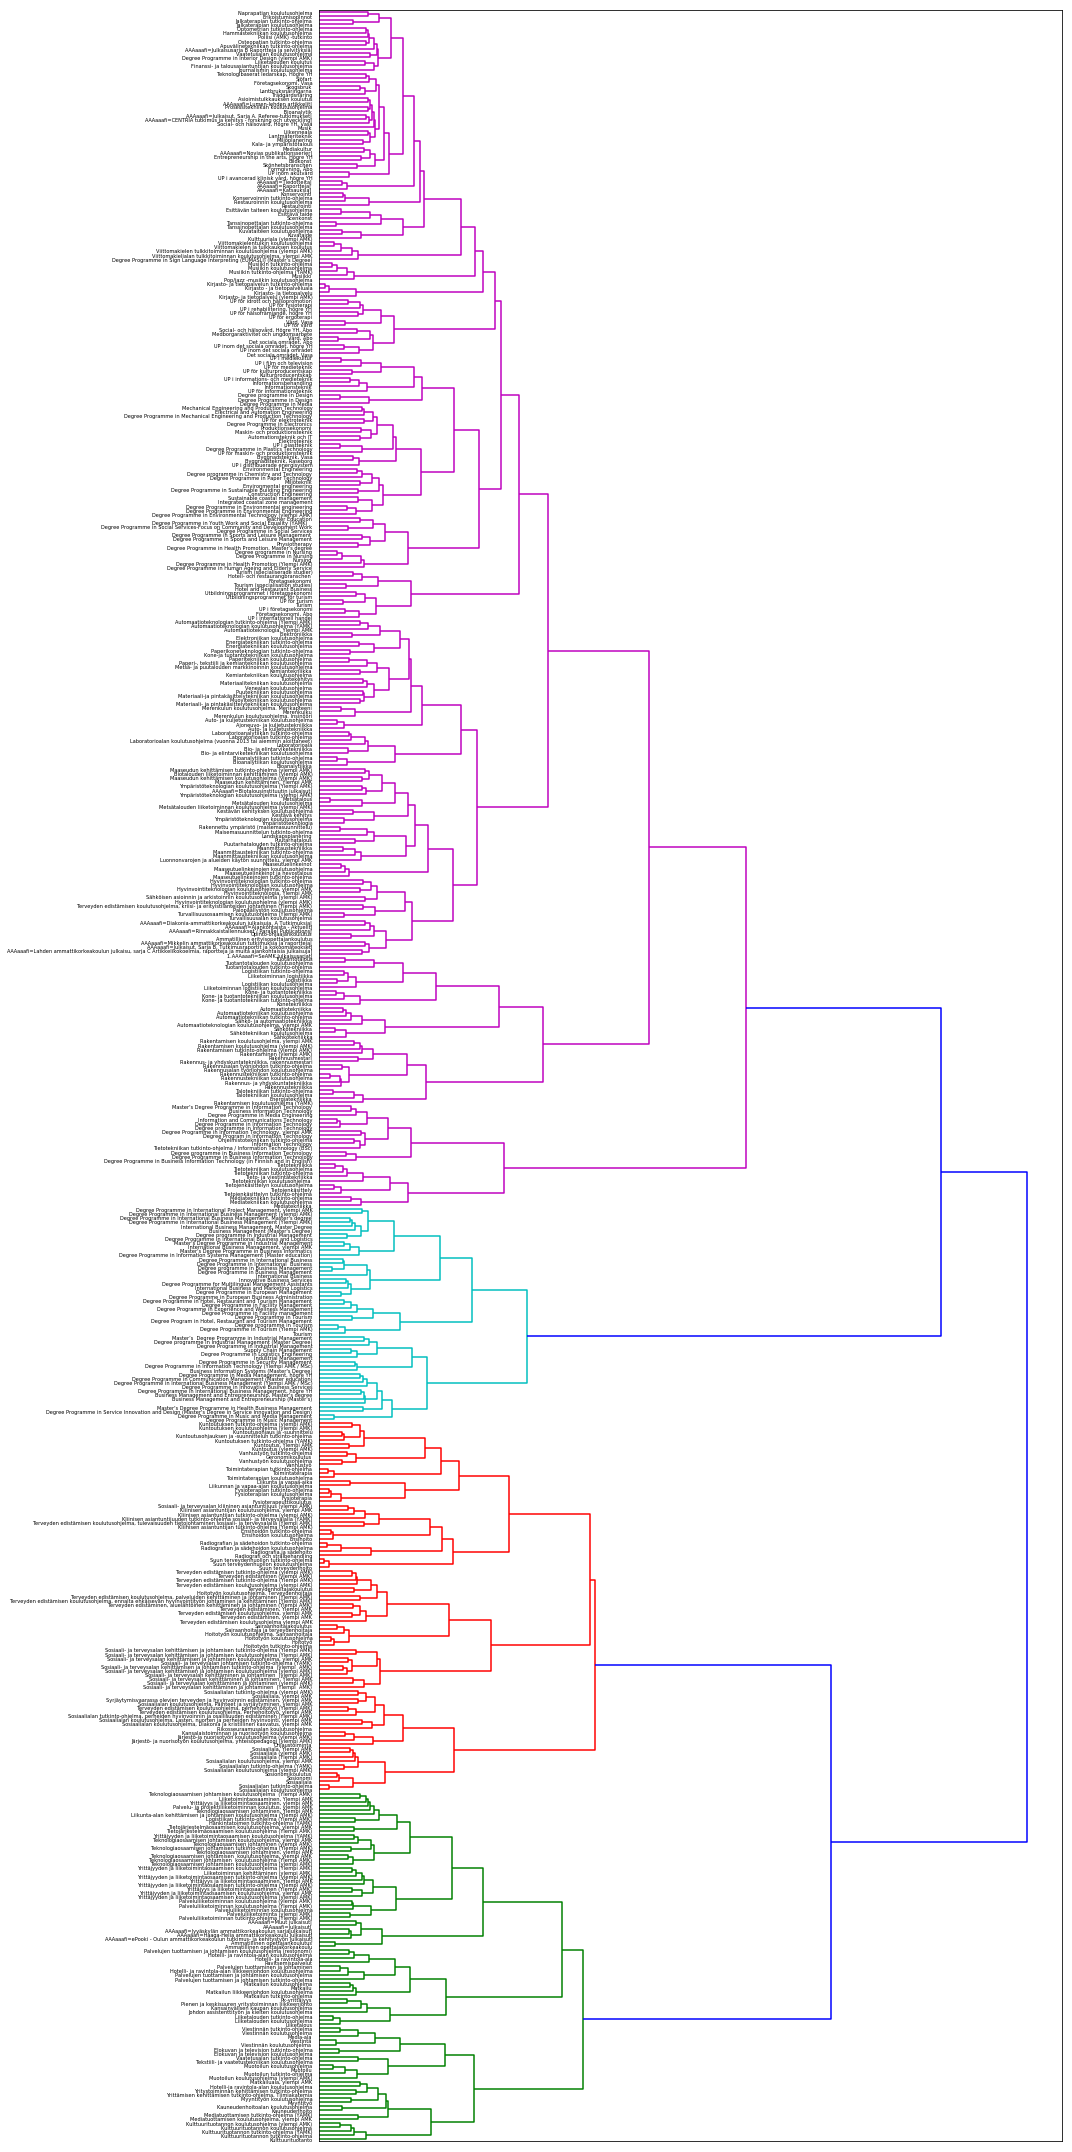

In [51]:
from scipy.cluster.hierarchy import ward, dendrogram
# http://brandonrose.org/clustering

linkage_matrix = ward(d) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 30)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=top.index.values);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout
#plt.savefig('degree-hierarchy.pdf', format='pdf') 

In [36]:
#m = MultiLabelBinarizer(sparse_output=True).fit_transform(df["topics"])

## TSNE

In [58]:
from sklearn.manifold import TSNE

In [79]:
tsne = TSNE()
# NOTE: tsne does not produce the same results between runs

In [80]:
# Make < 0 equal to 0
#cap_to_zero = np.vectorize(lambda x: 0 if x < 0 else x)
tsne.fit_transform(m.toarray())

array([[-34.06781119,  14.39440513],
       [ 11.83843571,  25.39090293],
       [-14.40534295, -26.57261345],
       ..., 
       [ 11.88031544, -13.88029278],
       [  8.70165539,  -3.1105704 ],
       [  8.31966494,  -1.60960481]])

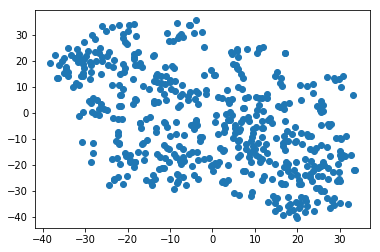

In [81]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

In [73]:
tsne.embedding_[:, 0].shape

(518,)

## Kmeans

In [90]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [105]:
def cluster(n_clusters):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters)
    kmeans.fit(m)
    score = silhouette_score(m, kmeans.labels_)
    return kmeans, score

In [122]:
scores = []
for n_clusters in range(2, 30):
    trials = []
    for trial in range(5):
        kmeans, score = cluster(n_clusters)
        trials.append(score)
    scores.append(trials)

In [124]:
scores = np.array(scores)

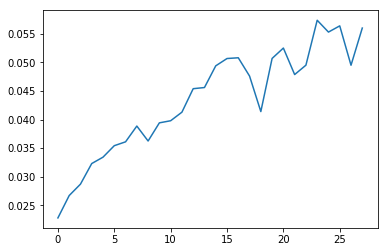

In [125]:
plt.plot(scores.max(axis=1))